In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('/content/drive/MyDrive/k/NLP/capstone/Cleaned_data.csv',)
df.head()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,Assignment group,SC + DC + Caller,Assignment RE-group,Cleaned,Length,Language
0,0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issuespxjnwir pjlcoqds-verified user det...,GRP_0,login issue verify user detail employee manage...,36,en
1,1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlookhmjdrvpb komuaywn\r\n\r\nreceived from:...,GRP_0,outlook hello team meeting skype meeting appea...,24,en
2,2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpneylqgodm ybqkwiam\r\n\r\nrec...,GRP_0,log vpn log vpn good,12,en
3,3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz gcpydtequnable to access hr_tool page,GRP_0,unable access hr tool page,6,en
4,4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme qhcozdfxskype error,GRP_0,skype error,2,en


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Short description', 'Description',
       'Caller', 'Assignment group', 'SC + DC + Caller', 'Assignment RE-group',
       'Cleaned', 'Length', 'Language'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','Short description','Description','Caller','SC + DC + Caller'],axis=1)

In [6]:
df.head(2)

,Assignment group,Assignment RE-group,Cleaned,Length,Language
0,GRP_0,GRP_0,login issue verify user detail employee manage...,36,en
1,GRP_0,GRP_0,outlook hello team meeting skype meeting appea...,24,en


In [7]:
# Selecting the Groups having more than 100 Indiviual records
Counts = pd.DataFrame(df['Assignment group'].value_counts())
Others = []
for Group in df['Assignment group'].unique():
    if Counts.loc[Group][0] < 200:
        Others.append(Group)
print('{0} Groups in dataset have less than 200 samples'.format(len(Others)))

df['Assignment RE-group'] =df['Assignment group'].apply(lambda x: 'Others' if x in Others else x)

66 Groups in dataset have less than 200 samples


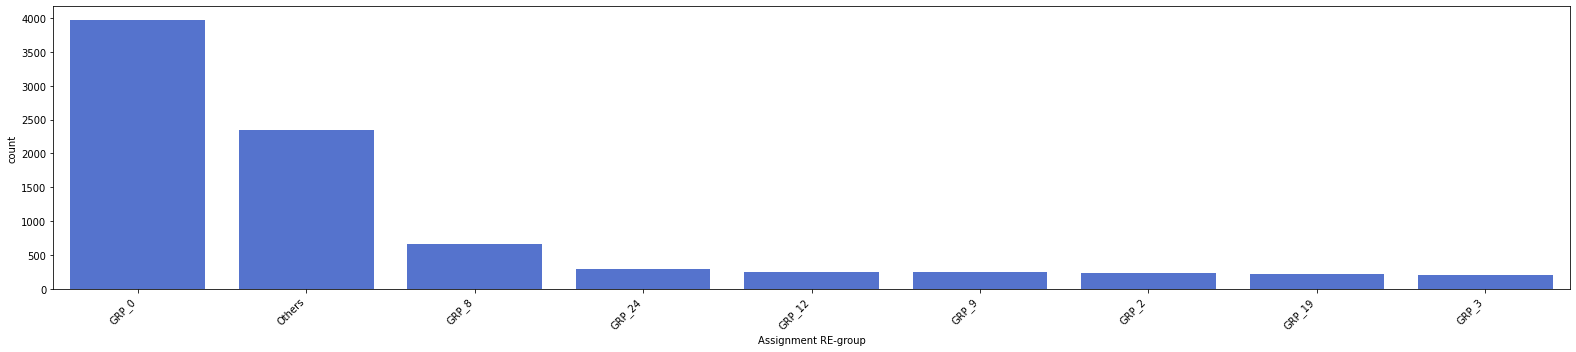

In [8]:
# Visualising the Distribution after re-classifing the groups in 'Others'.
plt.subplots(figsize=(22,5))
descending_order = df['Assignment RE-group'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(x='Assignment RE-group', data=df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [9]:
df.shape

(8437, 5)

In [10]:
df1 = df.copy()

In [11]:
# df1 = df.drop_duplicates(subset = 'Cleaned',keep = 'first')
# df1.shape

In [12]:
df.columns

Index(['Assignment group', 'Assignment RE-group', 'Cleaned', 'Length',
       'Language'],
      dtype='object')

In [13]:
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_49', 'GRP_50', 'GRP_51',
       'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_48', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [14]:
df['Assignment RE-group'].unique()

array(['GRP_0', 'Others', 'GRP_3', 'GRP_8', 'GRP_9', 'GRP_12', 'GRP_19',
       'GRP_2', 'GRP_24'], dtype=object)

In [15]:
df1[df1['Language'] != 'en'].shape

(657, 5)

In [16]:
df1 = df1[df1['Language'] == 'en']
df1.shape

(7780, 5)

In [17]:
df1 = df1[df1['Assignment RE-group'] != 'Others']
df1.shape

(5668, 5)

In [18]:
labels_ = df1['Assignment RE-group'].unique()
print(labels_)
print(df1['Assignment RE-group'].nunique())

['GRP_0' 'GRP_3' 'GRP_8' 'GRP_9' 'GRP_12' 'GRP_19' 'GRP_2' 'GRP_24']
8


In [19]:
df1['Length'].describe()

count    5668.000000
mean       26.556104
std        54.662342
min         2.000000
25%         5.000000
50%        14.000000
75%        29.000000
max      1033.000000
Name: Length, dtype: float64

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 10000,split = ' ')
tokenizer.fit_on_texts(df1['Cleaned'].values)

In [21]:
X = tokenizer.texts_to_sequences(df1['Cleaned'].values)
y = np.array(df1['Assignment RE-group'])

In [22]:
max_len = 30
X = pad_sequences(X,maxlen= max_len)

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [24]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes = 8)

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [26]:
print(x_train.shape,y_test.shape)

(4534, 30) (1134, 8)


# GLOVE Embeddings

In [27]:
vocab_len = len(tokenizer.word_index)+1
print(vocab_len)
embedding_size = 50

6579


In [28]:
Embedding_file = '/content/drive/MyDrive/k/NLP/capstone/glove.6B.50d.txt'

embedding_dict = {}
f = open(Embedding_file)
for line in f:
  values = line.split()
  word = values[0]
  vector = np.asarray(values[1:],dtype = 'float32')
  embedding_dict[word] = vector

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_len, embedding_size))

for word,i in tokenizer.word_index.items():
  embedding_vector = embedding_dict.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [29]:
embedding_matrix.shape

(6579, 50)

In [30]:
print(x_train.shape,y_train.shape)

(4534, 30) (4534, 8)


In [31]:
y_train_labels = np.argmax(y_train,axis=1)

In [32]:
y_train.shape

(4534, 8)

In [33]:
y_train_labels.shape

(4534,)

In [34]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [35]:
from sklearn.utils import class_weight
cw = class_weight.compute_class_weight(class_weight='balanced',classes = np.unique(y_train_labels),y = y_train_labels,)

In [36]:
cw

array([0.18288157, 3.13121547, 3.3735119 , 3.16620112, 7.87152778,
       3.52018634, 1.13577154, 3.23857143])

In [37]:
weights = dict()
for i in range(8):
  weights[i] = cw[i]

In [38]:
weights

{0: 0.1828815747015166,
 1: 3.1312154696132595,
 2: 3.3735119047619047,
 3: 3.166201117318436,
 4: 7.871527777777778,
 5: 3.520186335403727,
 6: 1.1357715430861723,
 7: 3.2385714285714284}

In [39]:
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout,Flatten,Bidirectional,GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [40]:
model = Sequential()
model.add(Embedding(input_dim = vocab_len,output_dim = embedding_size,input_length = max_len, weights = [embedding_matrix], trainable = False))
model.add(Bidirectional(GRU(50)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 50)            328950    
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               30600     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
Total params: 376,870
Trainable params: 47,920
Non-trainable params: 328,950
_____________________________________________

In [41]:
sgd = optimizers.SGD(learning_rate=0.001,momentum=0.9)
adam = optimizers.Adam()

model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])

In [42]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss',patience=3)
# reduc = ReduceLROnPlateau(monitor='val_loss',patience=4,factor=0.5)

In [43]:
model.fit(x_train,y_train,epochs=20,batch_size=16,validation_data=(x_test,y_test))

Epoch 1/20
284/284 [==============================] - 11s 25ms/step - loss: 1.1004 - accuracy: 0.7285 - val_loss: 0.8285 - val_accuracy: 0.7637
Epoch 2/20
284/284 [==============================] - 6s 21ms/step - loss: 0.6938 - accuracy: 0.7912 - val_loss: 0.7031 - val_accuracy: 0.7875
Epoch 3/20
284/284 [==============================] - 6s 20ms/step - loss: 0.5761 - accuracy: 0.8213 - val_loss: 0.6462 - val_accuracy: 0.7945
Epoch 4/20
284/284 [==============================] - 6s 21ms/step - loss: 0.4934 - accuracy: 0.8274 - val_loss: 0.6329 - val_accuracy: 0.8034
Epoch 5/20
284/284 [==============================] - 6s 21ms/step - loss: 0.4254 - accuracy: 0.8545 - val_loss: 0.6334 - val_accuracy: 0.7963
Epoch 6/20
284/284 [==============================] - 6s 21ms/step - loss: 0.3821 - accuracy: 0.8727 - val_loss: 0.6376 - val_accuracy: 0.7937
Epoch 7/20
284/284 [==============================] - 6s 21ms/step - loss: 0.3278 - accuracy: 0.8844 - val_loss: 0.6447 - val_accuracy: 0.786

In [44]:
model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 6ms/step - loss: 1.1849 - accuracy: 0.7804


[1.1848772764205933, 0.7804232835769653]

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
predicted_labels = model.predict(x_test)

In [47]:
y_pred = np.where(predicted_labels>0.5,1,0)

In [48]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [49]:
y_pred[0]

array([1, 0, 0, 0, 0, 0, 0, 0])

In [50]:
cm = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

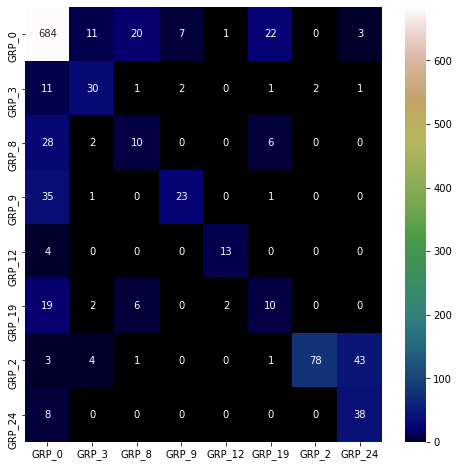

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,xticklabels=labels_,yticklabels=labels_,fmt='.4g',cmap='gist_earth')

In [52]:
df1['Assignment RE-group'].value_counts()

GRP_0     3847
GRP_8      629
GRP_2      239
GRP_12     229
GRP_9      221
GRP_19     214
GRP_3      200
GRP_24      89
Name: Assignment RE-group, dtype: int64

In [53]:
count = 0
for i in range(y_test.shape[0]):
  if y_train[i][0] == 1.0:
    count +=1
print(count)

769



# FASTTEXT Embeddings

In [54]:
from tqdm.notebook import tqdm

In [55]:
with open("/content/drive/MyDrive/k/NLP/capstone/wiki-news-300d-1M.vec", 'rb') as vecfile:  
  embeddings = {}
  limit = 4
  l = vecfile.readlines()
  l.pop(0)
  for index,line in tqdm(enumerate(l)):
    conv = str(line, 'utf-8')
    word = conv.split(" ")[0]
    embd = conv.split(" ")[1:]
    embd = list(map(float,embd))
    embd = np.asarray(embd)
    embeddings[word] = embd 

embedding_matrix = np.zeros((vocab_len, 300))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector


In [56]:
from tensorflow.keras.layers import LSTM,Embedding,Flatten,Input,Dense,Bidirectional
from tensorflow.keras.models import Sequential

In [57]:
model = Sequential()
model.add(Embedding(input_dim = vocab_len,output_dim = 300,weights = [embedding_matrix],input_length=max_len,trainable = False))
model.add(Bidirectional(LSTM(50)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Dense(8,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           1973700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
Total params: 2,121,084
Trainable params: 147,384
Non-trainable params: 1,973,700
______________________________________

In [58]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [59]:
model.fit(x_train,y_train,epochs=20,batch_size=16,validation_data=(x_test,y_test))

Epoch 1/20
284/284 [==============================] - 12s 32ms/step - loss: 1.0822 - accuracy: 0.7125 - val_loss: 0.6654 - val_accuracy: 0.7848
Epoch 2/20
284/284 [==============================] - 8s 28ms/step - loss: 0.6684 - accuracy: 0.7978 - val_loss: 0.5950 - val_accuracy: 0.8113
Epoch 3/20
284/284 [==============================] - 8s 28ms/step - loss: 0.5456 - accuracy: 0.8252 - val_loss: 0.5736 - val_accuracy: 0.8131
Epoch 4/20
284/284 [==============================] - 8s 28ms/step - loss: 0.4882 - accuracy: 0.8409 - val_loss: 0.5632 - val_accuracy: 0.8122
Epoch 5/20
284/284 [==============================] - 8s 28ms/step - loss: 0.4681 - accuracy: 0.8435 - val_loss: 0.5818 - val_accuracy: 0.8228
Epoch 6/20
284/284 [==============================] - 8s 28ms/step - loss: 0.4705 - accuracy: 0.8381 - val_loss: 0.5492 - val_accuracy: 0.8210
Epoch 7/20
284/284 [==============================] - 8s 28ms/step - loss: 0.4021 - accuracy: 0.8588 - val_loss: 0.5703 - val_accuracy: 0.815

In [60]:
model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 12ms/step - loss: 0.8057 - accuracy: 0.8175


[0.8057384490966797, 0.817460298538208]

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
predicted_labels = model.predict(x_test)

In [63]:
y_pred = np.where(predicted_labels>0.5,1,0)

In [64]:
cm = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))


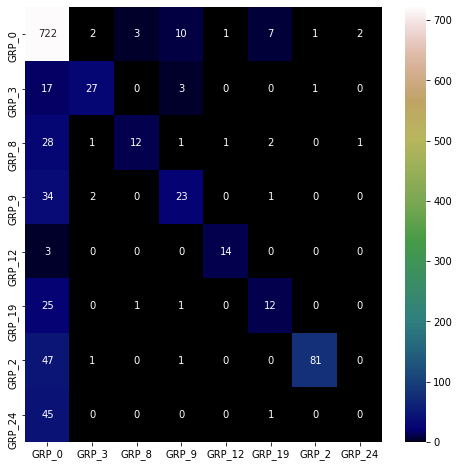

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,xticklabels=labels_,yticklabels=labels_,fmt='.4g',cmap='gist_earth')

# 